In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
data=pd.read_table("./Data_Extract_From_World_Development_Indicators_2/f55a1b6c-6a50-4ee3-bfc3-c775ea8759cc_Data.txt")

In [ ]:
data

,Time,Time Code,Country Name,Country Code,Access to electricity (% of population) [EG.ELC.ACCS.ZS],Agricultural land (% of land area) [AG.LND.AGRI.ZS],Bank capital to assets ratio (%) [FB.BNK.CAPA.ZS],"Secondary education, pupils [SE.SEC.ENRL]",GDP per capita (current US$) [NY.GDP.PCAP.CD],Rural population (% of total population) [SP.RUR.TOTL.ZS],...,Children out of school (% of primary school age) [SE.PRM.UNER.ZS],"Pupil-teacher ratio, primary [SE.PRM.ENRL.TC.ZS]","Gross intake ratio in first grade of primary education, total (% of relevant age group) [SE.PRM.GINT.ZS]","School enrollment, primary (gross), gender parity index (GPI) [SE.ENR.PRIM.FM.ZS]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Population, total [SP.POP.TOTL]",Proportion of seats held by women in national parliaments (%) [SG.GEN.PARL.ZS],Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],Number of people spending more than 10% of household consumption or income on out-of-pocket health care expenditure [SH.UHC.OOPC.10.TO]
0,2015,YR2015,Afghanistan,AFG,71.500000,58.067580,9.232694,2698816.0,578.466353,75.197000,...,NaN,44.32877,108.47540,0.68839,1.679000,3.441360e+07,27.700000,0.281553,1.451315,NaN
1,2015,YR2015,Albania,ALB,100.000000,42.857666,9.526138,315079.0,3952.830781,42.566000,...,2.20127,18.61557,111.00670,1.03130,17.080000,2.880703e+06,20.700000,10.232012,2.230000,NaN
2,2015,YR2015,Algeria,DZA,99.943069,17.405929,8.826316,NaN,4177.888966,29.152000,...,0.68412,23.83613,108.11130,0.95230,11.206000,3.972802e+07,31.600000,0.427837,3.763467,NaN
3,2015,YR2015,American Samoa,ASM,NaN,24.500000,NaN,NaN,11843.331183,12.762000,...,NaN,NaN,NaN,NaN,NaN,5.581200e+04,NaN,NaN,1.248050,NaN
4,2015,YR2015,Andorra,AND,100.000000,40.021275,NaN,4395.0,36039.653496,11.655000,...,NaN,9.93795,NaN,NaN,NaN,7.801100e+04,39.300000,NaN,0.842204,NaN
5,2015,YR2015,Angola,AGO,42.000000,47.477340,8.421779,NaN,4166.979684,36.554000,...,NaN,50.02951,NaN,0.87413,7.279000,2.788438e+07,36.800000,7.120381,0.943576,NaN
6,2015,YR2015,Antigua and Barbuda,ATG,100.000000,20.454545,5.641336,8048.0,14526.588085,75.000000,...,1.21900,14.33428,114.36870,0.96619,NaN,9.356600e+04,11.100000,NaN,4.025737,NaN
7,2015,YR2015,Argentina,ARG,99.823578,54.335712,12.280693,4501734.0,13789.060425,8.497000,...,0.05630,NaN,105.51890,0.99881,7.643000,4.313197e+07,NaN,3.067487,2.731160,NaN
8,2015,YR2015,Armenia,ARM,100.000000,58.893570,14.684982,240291.0,3607.296697,36.915000,...,6.96742,NaN,96.09745,1.01521,18.261000,2.925553e+06,10.700000,14.056075,3.200000,NaN
9,2015,YR2015,Aruba,ABW,100.000000,11.111111,NaN,NaN,25796.380251,56.892000,...,NaN,NaN,NaN,NaN,NaN,1.043410e+05,NaN,NaN,-0.450586,NaN


In [ ]:
data.isna().sum()

Time                                                                                                                                         3
Time Code                                                                                                                                    5
Country Name                                                                                                                                 5
Country Code                                                                                                                                 5
Access to electricity (% of population) [EG.ELC.ACCS.ZS]                                                                                     8
Agricultural land (% of land area) [AG.LND.AGRI.ZS]                                                                                         15
Bank capital to assets ratio (%) [FB.BNK.CAPA.ZS]                                                                                          145

In [ ]:
data=data.drop(columns=["Time","Time Code","Country Name","Number of people spending more than 10% of household consumption or income on out-of-pocket health care expenditure [SH.UHC.OOPC.10.TO]","Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS]","Bank capital to assets ratio (%) [FB.BNK.CAPA.ZS]"])

In [24]:
data.isna().sum()

Country Code                                                                                                 5
Access to electricity (% of population) [EG.ELC.ACCS.ZS]                                                     8
Agricultural land (% of land area) [AG.LND.AGRI.ZS]                                                         15
Secondary education, pupils [SE.SEC.ENRL]                                                                   75
GDP per capita (current US$) [NY.GDP.PCAP.CD]                                                               19
Rural population (% of total population) [SP.RUR.TOTL.ZS]                                                    9
Population density (people per sq. km of land area) [EN.POP.DNST]                                            9
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                                                    23
Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]                      99
C

In [ ]:
data.index=data["Country Code"]
data=data.drop(columns=["Country Code"])

In [94]:
data

,Access to electricity (% of population) [EG.ELC.ACCS.ZS],Agricultural land (% of land area) [AG.LND.AGRI.ZS],"Secondary education, pupils [SE.SEC.ENRL]",GDP per capita (current US$) [NY.GDP.PCAP.CD],Rural population (% of total population) [SP.RUR.TOTL.ZS],Population density (people per sq. km of land area) [EN.POP.DNST],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]",Children out of school (% of primary school age) [SE.PRM.UNER.ZS],"Pupil-teacher ratio, primary [SE.PRM.ENRL.TC.ZS]","Gross intake ratio in first grade of primary education, total (% of relevant age group) [SE.PRM.GINT.ZS]","School enrollment, primary (gross), gender parity index (GPI) [SE.ENR.PRIM.FM.ZS]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Population, total [SP.POP.TOTL]",Proportion of seats held by women in national parliaments (%) [SG.GEN.PARL.ZS],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]
Country Code,,,,,,,,,,,,,,,,
ALB,100.000000,42.857666,315079.0,3952.830781,42.566000,105.135146,78.025000,97.79873,2.20127,18.61557,111.00670,1.03130,17.080000,2.880703e+06,20.700000,2.230000
AUT,100.000000,32.941726,691071.3,44176.671743,42.285000,104.730793,81.190244,88.62591,0.47045,10.58415,98.79947,0.99097,5.723000,8.642699e+06,30.600000,1.142980
BHS,100.000000,1.398601,25766.0,31512.856555,17.254000,37.383217,73.088000,79.96521,18.40080,21.04116,87.15463,0.97338,12.000000,3.742060e+05,13.200000,1.044960
BHR,100.000000,11.053985,92454.0,22688.944400,11.001000,1763.304558,76.762000,98.02753,1.31748,11.73164,101.52670,1.00991,1.076000,1.371851e+06,7.500000,2.861968
BLR,100.000000,42.242016,644153.0,5949.106307,22.819000,46.751942,73.624390,94.25545,1.50754,17.57007,102.54340,1.00156,5.913000,9.489616e+06,27.300000,-3.829571
BEL,100.000000,43.857332,1217912.0,40441.052042,2.124000,372.331440,80.992683,98.38347,0.97579,11.23127,98.58350,0.99830,8.482000,1.127420e+07,39.300000,1.739580
BLZ,91.800000,7.014467,37856.0,4883.179011,54.594000,15.823455,74.034000,99.28398,0.41269,20.43642,105.28140,0.95398,9.970000,3.609330e+05,3.100000,3.431950
BOL,91.522822,34.765070,1153379.0,3035.972215,31.607000,10.033906,70.277000,88.70123,11.03696,18.10837,94.79886,0.97941,3.066000,1.086973e+07,53.100000,4.857188
BFA,21.789345,44.225146,965550.0,575.314454,72.470000,66.193801,59.919000,69.95995,29.94701,42.17715,105.40330,0.97444,6.704000,1.811062e+07,9.400000,3.894548


In [ ]:
variablesNames=["electricity",
"agricultural",
"secondary_pupils",	
"GDP_p_c",
"rural_population",
"population_density",
"life_expectancy",
"enrollment_rate",
"out_of_school",
"pupil_teacher_ratio",
"gross_intake",
"GPI",
"unemployment",
"population",
"proportion_women",
"GDP_growth"]
data.columns=variablesNames

In [ ]:
data

,electricity,agricultural,secondary_pupils,GDP_p_c,rural_population,population_density,life_expectancy,enrollment_rate,out_of_school,pupil_teacher_ratio,gross_intake,GPI,unemployment,population,proportion_women,GDP_growth
Country Code,,,,,,,,,,,,,,,,
ALB,100.000000,42.857666,315079.0,3952.830781,42.566000,105.135146,78.025000,97.79873,2.20127,18.61557,111.00670,1.03130,17.080000,2.880703e+06,20.700000,2.230000
AUT,100.000000,32.941726,691071.3,44176.671743,42.285000,104.730793,81.190244,88.62591,0.47045,10.58415,98.79947,0.99097,5.723000,8.642699e+06,30.600000,1.142980
BHS,100.000000,1.398601,25766.0,31512.856555,17.254000,37.383217,73.088000,79.96521,18.40080,21.04116,87.15463,0.97338,12.000000,3.742060e+05,13.200000,1.044960
BHR,100.000000,11.053985,92454.0,22688.944400,11.001000,1763.304558,76.762000,98.02753,1.31748,11.73164,101.52670,1.00991,1.076000,1.371851e+06,7.500000,2.861968
BLR,100.000000,42.242016,644153.0,5949.106307,22.819000,46.751942,73.624390,94.25545,1.50754,17.57007,102.54340,1.00156,5.913000,9.489616e+06,27.300000,-3.829571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SSF,39.399695,43.679445,58900000.0,1669.443418,61.408927,46.861951,59.952831,77.56615,20.04884,37.50596,114.13590,0.95645,6.076070,9.954585e+08,23.640948,2.815844
SSA,39.394007,43.680318,58900000.0,1668.215982,61.410505,46.858568,59.951484,77.56523,20.04984,37.50958,114.13660,0.95645,6.076070,9.953651e+08,23.566474,2.814316
TSS,39.399695,43.679445,58900000.0,1669.443418,61.408927,46.861951,59.952831,77.56615,20.04884,37.50596,114.13590,0.95645,6.076070,9.954585e+08,23.640948,2.815844


In [ ]:
corOfData=data.corr()
corOfData

,electricity,agricultural,secondary_pupils,GDP_p_c,rural_population,population_density,life_expectancy,enrollment_rate,out_of_school,pupil_teacher_ratio,gross_intake,GPI,unemployment,population,proportion_women,GDP_growth
electricity,1.000000,-0.236821,0.482443,0.376519,-0.584795,0.095038,0.835796,0.687581,-0.660667,-0.835100,-0.428228,0.353328,0.166478,0.014767,0.018687,-0.024796
agricultural,-0.236821,1.000000,0.018707,-0.197358,0.212953,-0.137162,-0.278729,-0.094901,0.151489,0.309066,0.160345,-0.085621,0.037052,0.051288,0.111063,0.074370
secondary_pupils,0.482443,0.018707,1.000000,0.040008,-0.168097,-0.081474,0.300887,0.491608,-0.471414,-0.297407,-0.121107,0.264329,0.133211,-0.021823,0.025190,0.120169
GDP_p_c,0.376519,-0.197358,0.040008,1.000000,-0.451890,0.449994,0.612536,0.321087,-0.317581,-0.465338,-0.209286,0.166105,-0.064614,-0.097639,0.174872,-0.090245
rural_population,-0.584795,0.212953,-0.168097,-0.451890,1.000000,-0.225526,-0.621392,-0.364479,0.347824,0.594658,0.364086,-0.257947,-0.111049,0.099604,-0.113455,0.187442
population_density,0.095038,-0.137162,-0.081474,0.449994,-0.225526,1.000000,0.187749,0.054760,-0.049140,-0.118186,-0.022110,0.034968,-0.105408,-0.048727,-0.013030,-0.226522
life_expectancy,0.835796,-0.278729,0.300887,0.612536,-0.621392,0.187749,1.000000,0.626769,-0.652719,-0.817139,-0.331460,0.399783,0.064519,-0.030492,0.170573,-0.024024
enrollment_rate,0.687581,-0.094901,0.491608,0.321087,-0.364479,0.054760,0.626769,1.000000,-0.906446,-0.596131,0.278669,0.517649,0.068646,-0.026972,0.122545,0.083992
out_of_school,-0.660667,0.151489,-0.471414,-0.317581,0.347824,-0.049140,-0.652719,-0.906446,1.000000,0.631323,-0.272368,-0.512297,-0.015752,0.026886,-0.077026,-0.070655
pupil_teacher_ratio,-0.835100,0.309066,-0.297407,-0.465338,0.594658,-0.118186,-0.817139,-0.596131,0.631323,1.000000,0.373776,-0.374889,-0.223440,0.040069,-0.001974,0.124024


,electricity,agricultural,secondary_pupils,GDP_p_c,rural_population,population_density,life_expectancy,enrollment_rate,out_of_school,pupil_teacher_ratio,gross_intake,GPI,unemployment,population,proportion_women,GDP_growth
electricity,1.000000,-0.213015,0.001754,0.407620,-0.679918,0.149363,0.868189,0.693242,-0.721994,-0.859718,-0.357488,0.531558,0.161777,-0.027474,0.121554,-0.004903
agricultural,-0.213015,1.000000,-0.019631,-0.246361,0.181667,-0.082889,-0.292264,-0.155880,0.151598,0.239836,0.031228,-0.128189,0.172609,-0.018581,0.126185,0.055617
secondary_pupils,0.001754,-0.019631,1.000000,-0.113457,0.143631,-0.089189,-0.045585,-0.011320,0.011662,0.069820,0.027750,0.138958,-0.179322,0.997718,-0.008159,0.068565
GDP_p_c,0.407620,-0.246361,-0.113457,1.000000,-0.632758,0.127719,0.631966,0.383217,-0.398751,-0.569991,-0.161076,0.259309,-0.063915,-0.119106,0.235060,-0.016753
rural_population,-0.679918,0.181667,0.143631,-0.632758,1.000000,-0.216131,-0.767453,-0.532571,0.524037,0.683930,0.342593,-0.379680,-0.043463,0.162062,-0.193973,0.055336
population_density,0.149363,-0.082889,-0.089189,0.127719,-0.216131,1.000000,0.193328,0.143170,-0.151466,-0.163849,0.011943,0.132247,-0.107783,-0.091984,-0.160294,0.150510
life_expectancy,0.868189,-0.292264,-0.045585,0.631966,-0.767453,0.193328,1.000000,0.641236,-0.666292,-0.860190,-0.321068,0.534794,0.069815,-0.065698,0.222935,0.018816
enrollment_rate,0.693242,-0.155880,-0.011320,0.383217,-0.532571,0.143170,0.641236,1.000000,-0.982079,-0.697091,0.198245,0.426263,0.155605,-0.035060,0.203263,-0.251176
out_of_school,-0.721994,0.151598,0.011662,-0.398751,0.524037,-0.151466,-0.666292,-0.982079,1.000000,0.718345,-0.190400,-0.436499,-0.155109,0.034550,-0.207221,0.267788
pupil_teacher_ratio,-0.859718,0.239836,0.069820,-0.569991,0.683930,-0.163849,-0.860190,-0.697091,0.718345,1.000000,0.321789,-0.569198,-0.204960,0.090060,-0.127981,0.137061


In [ ]:
for i, row in enumerate(corOfData.values):
    for j, column in enumerate(row):
        if i>j and (corOfData.values[i][j]>0.0 or corOfData.values[i][j]<-0.0) and (corOfData.index[i] != corOfData.index[j]) :
            print(corOfData.index[i]," - ",corOfData.index[j]," : ", corOfData.values[i][j])    

agricultural  -  electricity  :  -0.23682128014734086
secondary_pupils  -  electricity  :  0.4824431334784639
secondary_pupils  -  agricultural  :  0.018706779498255718
GDP_p_c  -  electricity  :  0.3765190582392971
GDP_p_c  -  agricultural  :  -0.1973578083026433
GDP_p_c  -  secondary_pupils  :  0.04000770265504645
rural_population  -  electricity  :  -0.5847946483340389
rural_population  -  agricultural  :  0.21295345018320755
rural_population  -  secondary_pupils  :  -0.1680972545129691
rural_population  -  GDP_p_c  :  -0.4518900131242378
population_density  -  electricity  :  0.09503828980963136
population_density  -  agricultural  :  -0.13716198192658968
population_density  -  secondary_pupils  :  -0.08147409621648519
population_density  -  GDP_p_c  :  0.44999402419143514
population_density  -  rural_population  :  -0.22552649516032325
life_expectancy  -  electricity  :  0.8357958399972683
life_expectancy  -  agricultural  :  -0.2787290089739967
life_expectancy  -  secondary_pupil

In [34]:
data["secondary_pupils"]=data["secondary_pupils"]/data["population"]*10
data

,electricity,agricultural,secondary_pupils,GDP_p_c,rural_population,population_density,life_expectancy,enrollment_rate,out_of_school,pupil_teacher_ratio,gross_intake,GPI,unemployment,population,proportion_women,GDP_growth
Country Code,,,,,,,,,,,,,,,,
AFG,71.500000,58.067580,2.278836e-07,578.466353,75.197,52.712072,63.377,NaN,NaN,44.32877,108.4754,0.68839,1.679,34413603.0,27.7,1.451315
ALB,100.000000,42.857666,3.796842e-06,3952.830781,42.566,105.135146,78.025,97.79873,2.20127,18.61557,111.0067,1.03130,17.080,2880703.0,20.7,2.230000
DZA,99.943069,17.405929,NaN,4177.888966,29.152,16.680253,76.090,NaN,0.68412,23.83613,108.1113,0.95230,11.206,39728025.0,31.6,3.763467
ASM,NaN,24.500000,NaN,11843.331183,12.762,279.060000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55812.0,NaN,1.248050
AND,100.000000,40.021275,7.221829e-05,36039.653496,11.655,165.980851,NaN,NaN,NaN,9.93795,NaN,NaN,NaN,78011.0,39.3,0.842204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
data["GDP_p_c"]
max(data["GDP_p_c"])
data.max() 

electricity            1.000000e+02
agricultural           8.255971e+01
secondary_pupils       1.046370e-03
GDP_p_c                1.672909e+05
rural_population       8.792200e+01
population_density     1.980543e+04
life_expectancy        8.427805e+01
enrollment_rate        9.995062e+01
out_of_school          6.235948e+01
pupil_teacher_ratio    6.950969e+01
gross_intake           1.775833e+02
GPI                    1.119540e+00
unemployment           2.765000e+01
population             7.340548e+09
proportion_women       6.380000e+01
GDP_growth             2.516253e+01
dtype: float64

In [36]:
data['GDP_p_c'].max()
data[data['GDP_p_c']==data['GDP_p_c'].max()]

,electricity,agricultural,secondary_pupils,GDP_p_c,rural_population,population_density,life_expectancy,enrollment_rate,out_of_school,pupil_teacher_ratio,gross_intake,GPI,unemployment,population,proportion_women,GDP_growth
Country Code,,,,,,,,,,,,,,,,
LIE,100.0,32.249999,0.000239,167290.939984,85.697,234.1875,82.656098,99.80767,0.03349,7.84524,94.59459,0.98414,NaN,37470.0,20.0,NaN


In [37]:
data["GDP_p_c"]=data["GDP_p_c"]/data['GDP_p_c'].max()*100
data["population_density"]=data["population_density"]/data['population_density'].max()*100

In [38]:
data

,electricity,agricultural,secondary_pupils,GDP_p_c,rural_population,population_density,life_expectancy,enrollment_rate,out_of_school,pupil_teacher_ratio,gross_intake,GPI,unemployment,population,proportion_women,GDP_growth
Country Code,,,,,,,,,,,,,,,,
AFG,71.500000,58.067580,2.278836e-07,0.345785,75.197,0.266150,63.377,NaN,NaN,44.32877,108.4754,0.68839,1.679,34413603.0,27.7,1.451315
ALB,100.000000,42.857666,3.796842e-06,2.362848,42.566,0.530840,78.025,97.79873,2.20127,18.61557,111.0067,1.03130,17.080,2880703.0,20.7,2.230000
DZA,99.943069,17.405929,NaN,2.497379,29.152,0.084221,76.090,NaN,0.68412,23.83613,108.1113,0.95230,11.206,39728025.0,31.6,3.763467
ASM,NaN,24.500000,NaN,7.079482,12.762,1.409008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55812.0,NaN,1.248050
AND,100.000000,40.021275,7.221829e-05,21.543099,11.655,0.838057,NaN,NaN,NaN,9.93795,NaN,NaN,NaN,78011.0,39.3,0.842204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
corOfData=data.corr()
corOfData

,electricity,agricultural,secondary_pupils,GDP_p_c,rural_population,population_density,life_expectancy,enrollment_rate,out_of_school,pupil_teacher_ratio,gross_intake,GPI,unemployment,population,proportion_women,GDP_growth
electricity,1.000000,-0.236821,0.108879,0.376519,-0.584795,0.095038,0.835796,0.687581,-0.660667,-0.835100,-0.428228,0.353328,0.166478,0.014767,0.018687,-0.024796
agricultural,-0.236821,1.000000,0.003080,-0.197358,0.212953,-0.137162,-0.278729,-0.094901,0.151489,0.309066,0.160345,-0.085621,0.037052,0.051288,0.111063,0.074370
secondary_pupils,0.108879,0.003080,1.000000,0.145593,0.025825,0.124785,0.114349,0.046298,-0.037747,-0.155758,0.035052,-0.035186,0.113332,-0.080679,-0.142061,0.095358
GDP_p_c,0.376519,-0.197358,0.145593,1.000000,-0.451890,0.449994,0.612536,0.321087,-0.317581,-0.465338,-0.209286,0.166105,-0.064614,-0.097639,0.174872,-0.090245
rural_population,-0.584795,0.212953,0.025825,-0.451890,1.000000,-0.225526,-0.621392,-0.364479,0.347824,0.594658,0.364086,-0.257947,-0.111049,0.099604,-0.113455,0.187442
population_density,0.095038,-0.137162,0.124785,0.449994,-0.225526,1.000000,0.187749,0.054760,-0.049140,-0.118186,-0.022110,0.034968,-0.105408,-0.048727,-0.013030,-0.226522
life_expectancy,0.835796,-0.278729,0.114349,0.612536,-0.621392,0.187749,1.000000,0.626769,-0.652719,-0.817139,-0.331460,0.399783,0.064519,-0.030492,0.170573,-0.024024
enrollment_rate,0.687581,-0.094901,0.046298,0.321087,-0.364479,0.054760,0.626769,1.000000,-0.906446,-0.596131,0.278669,0.517649,0.068646,-0.026972,0.122545,0.083992
out_of_school,-0.660667,0.151489,-0.037747,-0.317581,0.347824,-0.049140,-0.652719,-0.906446,1.000000,0.631323,-0.272368,-0.512297,-0.015752,0.026886,-0.077026,-0.070655
pupil_teacher_ratio,-0.835100,0.309066,-0.155758,-0.465338,0.594658,-0.118186,-0.817139,-0.596131,0.631323,1.000000,0.373776,-0.374889,-0.223440,0.040069,-0.001974,0.124024


In [40]:
from seaborn import clustermap

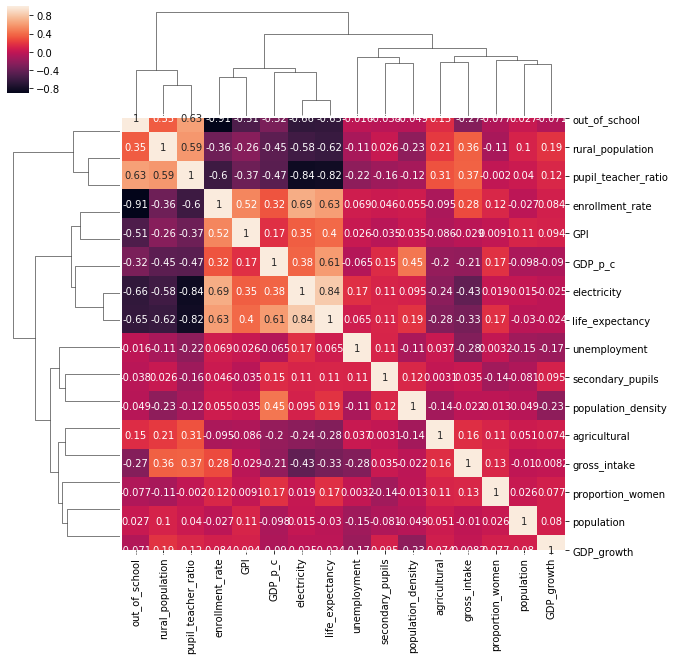

In [41]:
clustermap(corOfData,annot=True)

In [101]:
print(max(data["pupil_teacher_ratio"]))
print(min(data["pupil_teacher_ratio"]))

55.54179
8.45773


In [102]:
tot_pop=data["population"]
gdp_growth=data["GDP_growth"]
secondary=data["secondary_pupils"]/tot_pop*100
secondary#% of pop in seondadry school

Country Code
ALB    10.937573
AUT     7.996013
BHS     6.885512
BHR     6.739362
BLR     6.787978
BEL    10.802651
BLZ    10.488373
BOL    10.610926
BFA     5.331401
CPV    11.178234
CMR     9.049042
TCD     3.637226
CHL     8.605335
COL    10.088164
CRI     9.494031
CIV     6.834316
HRV     8.568957
CUB     7.285395
CYP     4.923492
DJI     6.508037
DOM     9.040283
SLV     9.485142
SWZ     9.102355
GEO     7.459152
DEU     8.707608
GRC     6.124648
HND     6.998056
HUN     8.398086
ISL    11.129483
IRN     7.277764
         ...    
ECA     8.859803
TEC     8.674839
EUU     8.318332
HPC     5.639660
HIC     7.638542
IBD     8.462955
IBT     7.980506
IDB     6.892173
IDX     6.398153
LCN    10.273104
LAC    10.381849
TLA    10.363173
LDC     6.226549
LMY     8.001013
LIC     5.723860
LMC     8.626465
MEA     8.336821
MNA     8.269786
TMN     8.173354
MIC     8.279025
OED     8.512522
OSS     6.977758
PST     7.657070
PRE     5.793610
SST     7.308695
SSF     5.916872
SSA     5.917427
T

REmoving correlated variables

In [42]:
data=data.drop(columns=["out_of_school","electricity","agricultural","life_expectancy","secondary_pupils","population","proportion_women","rural_population","pupil_teacher_ratio","population_density"])

In [43]:
data[data['gross_intake']==data['gross_intake'].max()]

,GDP_p_c,enrollment_rate,gross_intake,GPI,unemployment,GDP_growth
Country Code,,,,,,
MDG,0.240353,NaN,177.5833,0.99973,1.8,3.116615


In [44]:
data[data['GDP_growth']==data['GDP_growth'].max()]


,GDP_p_c,enrollment_rate,gross_intake,GPI,unemployment,GDP_growth
Country Code,,,,,,
IRL,37.058446,99.95062,97.0585,0.996,9.904,25.162533


In [45]:
corOfData=data.corr()
corOfData

,GDP_p_c,enrollment_rate,gross_intake,GPI,unemployment,GDP_growth
GDP_p_c,1.000000,0.321087,-0.209286,0.166105,-0.064614,-0.090245
enrollment_rate,0.321087,1.000000,0.278669,0.517649,0.068646,0.083992
gross_intake,-0.209286,0.278669,1.000000,-0.029190,-0.276247,0.008219
GPI,0.166105,0.517649,-0.029190,1.000000,0.026324,0.093584
unemployment,-0.064614,0.068646,-0.276247,0.026324,1.000000,-0.172119
GDP_growth,-0.090245,0.083992,0.008219,0.093584,-0.172119,1.000000


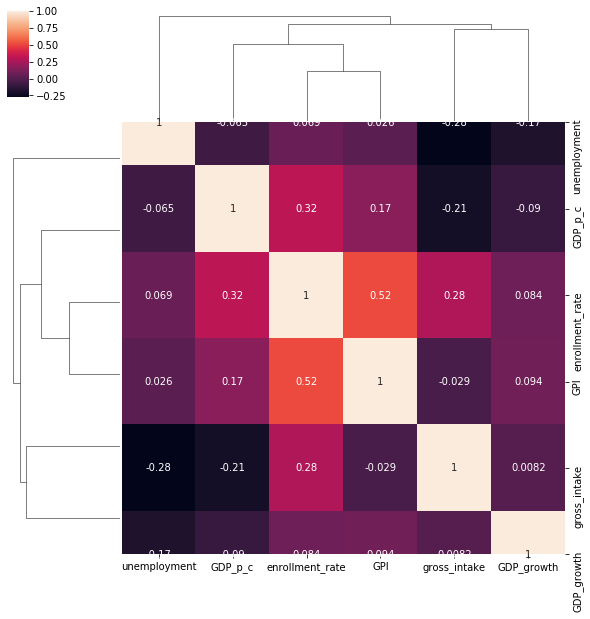

In [46]:
clustermap(corOfData,annot=True)

In [54]:
data=data.dropna(axis='rows')
data



,GDP_p_c,enrollment_rate,gross_intake,GPI,unemployment,GDP_growth
Country Code,,,,,,
ALB,2.362848,97.79873,111.00670,1.03130,17.080000,2.230000
ARG,8.242563,99.83682,105.51890,0.99881,7.643000,2.731160
ARM,2.156301,93.03258,96.09745,1.01521,18.261000,3.200000
AUT,26.407092,88.62591,98.79947,0.99097,5.723000,1.142980
AZE,3.287877,94.26275,101.24680,0.98318,4.960000,1.050751
...,...,...,...,...,...,...
SSF,0.997928,77.56615,114.13590,0.95645,6.076070,2.815844
SSA,0.997194,77.56523,114.13660,0.95645,6.076070,2.814316
TSS,0.997928,77.56615,114.13590,0.95645,6.076070,2.815844


In [53]:
data.to_csv(index=True)
f= open("data.txt","w+")
f.write(data.to_csv(index=True))


13166

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2)
outliers = dbscan.fit_predict(data)
outliers = outliers == -1
data[outliers]
data.describe()

,GDP_p_c,enrollment_rate,gross_intake,GPI,unemployment,GDP_growth
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,8.791153,90.947069,103.545476,0.982150,7.804790,2.918068
std,11.211412,10.995930,12.897676,0.047527,5.383550,4.561756
min,0.215704,35.250720,62.301530,0.707800,0.160000,-21.594488
25%,1.554232,88.378780,98.287180,0.969770,4.359417,1.838304
50%,4.137349,95.365960,101.374500,0.994260,6.617682,2.955946
75%,10.499094,97.891145,105.936950,1.000550,9.905018,4.255973
max,60.032162,99.950620,160.765000,1.119540,26.068001,25.162533
